In [224]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [225]:
data = pd.read_csv("D:\Kunal\Projects\MNIST\mnist_train.csv")
data1 = pd.read_csv("D:\Kunal\Projects\MNIST\mnist_test.csv")

In [226]:
#Splitting the data
x_train = data.iloc[:60000, 1:]
y_train = data.iloc[:60000, 0]

In [227]:
x_train = np.asfarray(x_train)
y_train = np.asfarray(y_train)

In [228]:
#Flattening the features
x_t = x_train.T/255
y_train = y_train.reshape((len(y_train), 1))
y_t = np.zeros((len(y_train), 10))

In [229]:
for i in range(len(y_train)):
    for j in range(10):
        if j==y_train[i]:
            y_t[i,j] = 1
y_t = y_t.T

In [230]:
#sigmoid function
def sig(X):
    a=1/(1 + np.exp(-1*X))
    return a

In [231]:
#ReLU Function
def relu(X):
    return X*(X>0)

#Derivative of ReLU Function
def relu_der(X):
    return 1*(X>0)

In [232]:
#cost function
def cost(a, y):
    c = (-1/y.shape[1])*(np.sum((y * np.log(a)) + ((1-y) * np.log(1-a))))
    return c

In [233]:
#different random num for every invocation
np.random.seed(1)

In [234]:
#Initialization
alpha = 0.00001
c_past = np.zeros((2000, 1))
m = len(y_t)

In [235]:
# Initializing the parameters randomly
w1 = np.random.rand(50, 784)*0.01
b1 = np.random.rand(50, 1)
w2 = np.random.rand(10, 50)*0.01
b2 = np.random.rand(10, 1)

In [238]:
for i in range(2000):
    t1 = time.clock()
    
    #Forward Propogation
    z1 = np.dot(w1, x_t) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sig(z2)
    
    #cost compute
    j = cost(a2, y_t)
    c_past[i] = j
    
    #BackPropogation
    dz2 = a2 - y_t
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * relu_der(z1)
    dw1 = (1/m)*np.dot(dz1, x_t.T)
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)
    
    #gradient descent
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    
    t2 = time.clock() - t1
    print("Epoch: {0}, Time: {1}, Cost: {2}".format(i, t2, j))

Epoch: 0, Time: 0.5893383638676823, Cost: 0.6489214620213457
Epoch: 1, Time: 0.5719398421770165, Cost: 0.6486267178030757
Epoch: 2, Time: 0.5675407986391292, Cost: 0.6483324629511631
Epoch: 3, Time: 0.5404124518136086, Cost: 0.6480387047693299
Epoch: 4, Time: 0.504007203009678, Cost: 0.6477453946078451
Epoch: 5, Time: 0.4843838148162831, Cost: 0.6474525102190235
Epoch: 6, Time: 0.533984006196988, Cost: 0.6471600718773421
Epoch: 7, Time: 0.5803787269069289, Cost: 0.6468680335563539
Epoch: 8, Time: 0.5609566378943782, Cost: 0.6465764535636567
Epoch: 9, Time: 0.528415458172276, Cost: 0.646285373849858
Epoch: 10, Time: 0.5929128830384798, Cost: 0.6459947898487793
Epoch: 11, Time: 0.49566349778433505, Cost: 0.6457046989171484
Epoch: 12, Time: 0.618062517252838, Cost: 0.6454150009322378
Epoch: 13, Time: 0.5969027641076536, Cost: 0.6451256870646335
Epoch: 14, Time: 0.5768246293919219, Cost: 0.644836790042808
Epoch: 15, Time: 0.5961292938818588, Cost: 0.644548325848053
Epoch: 16, Time: 0.64052

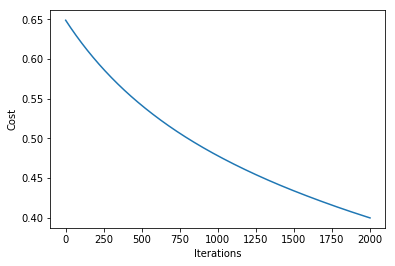

In [239]:
x_a = np.arange(1, 2001, 1)
plt.plot(x_a, c_past)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [240]:
pred_train = np.zeros((x_t.shape[1], 1))

for i in range(x_t.shape[1]):
    pred_train[i] = np.argmax(a2[:,i])

In [241]:
c = 0
for i in range(x_t.shape[1]):
    if pred_train[i] == y_train[i]:
        c = c + 1
print(str(c/x_t.shape[1] * 100)+" % accuracy for the training set")

94.25333333333333 % accuracy for the training set


In [242]:
x_test = data1.iloc[:10000,1:]
y_test = data1.iloc[:10000, 0]

In [243]:
x_test = np.asfarray(x_test)
y_test = np.asfarray(y_test)

In [244]:
x_test = x_test.T/255
y_test = y_test.reshape(x_test.shape[1], 1)

In [245]:
def prediction(x):
    z1_t = np.dot(w1, x_test) + b1
    a1_t = relu(z1_t)
    z2_t = np.dot(w2, a1_t) + b2
    a2_t = sig(z2_t)
    return a2_t

In [246]:
a2_t = prediction(x_test)

In [247]:
pred_test = np.zeros((x_test.shape[1], 1))

for i in range(x_test.shape[1]):
    pred_test[i] = np.argmax(a2_t[:,i])

In [248]:
c = 0
for i in range(x_test.shape[1]):
    if pred_test[i] == y_test[i]:
        c = c + 1
print(str(c/x_test.shape[1] * 100)+" % accuracy for the test data set")

94.23 % accuracy for the test data set
